<a href="https://colab.research.google.com/github/battuvenky/AIML_ASSGNIMENTS_2025/blob/main/AIML_Assg_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
fetch_openml(data_id=5).keys

<function Bunch.keys>

In [4]:
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car', version=2,
                        parser='auto')

In [5]:
type(car_data)

sklearn.utils._bunch.Bunch

In [6]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
car_data.feature_names, car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [8]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [9]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [10]:
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [ ]:

type(car_data)

pandas.core.frame.DataFrame

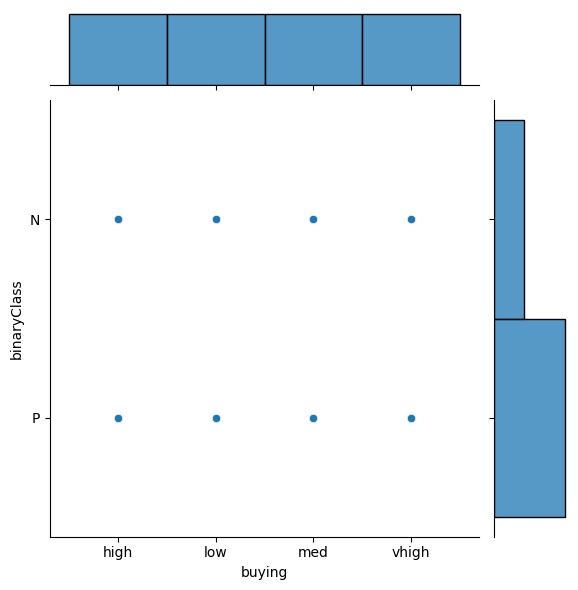

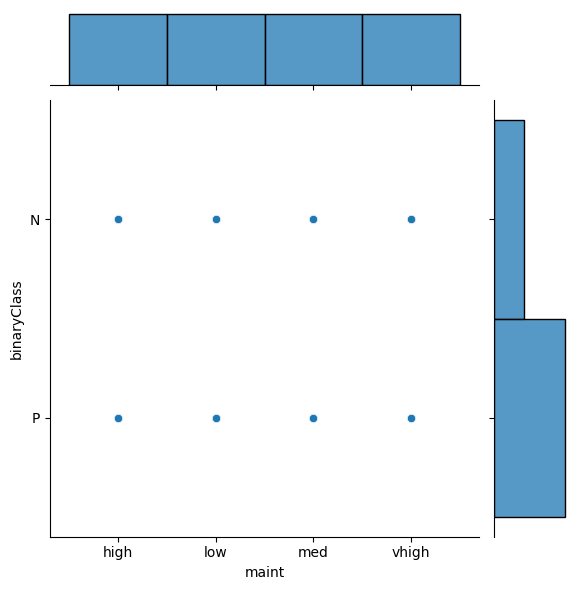

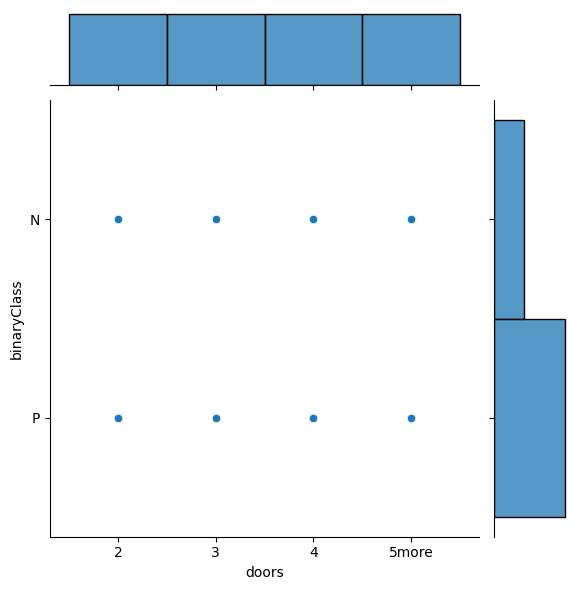

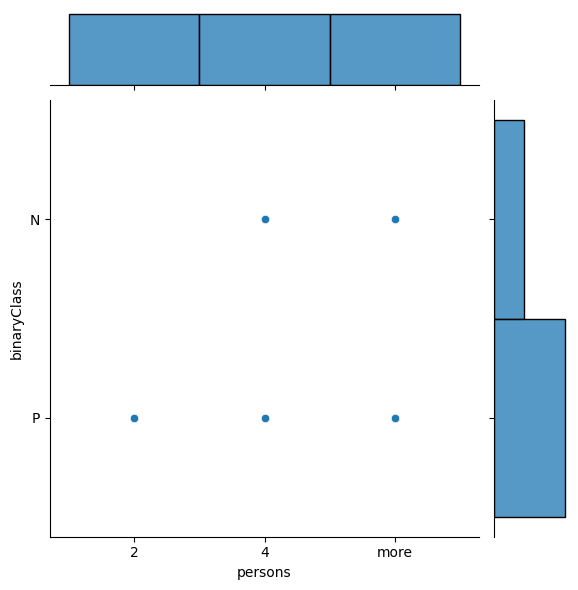

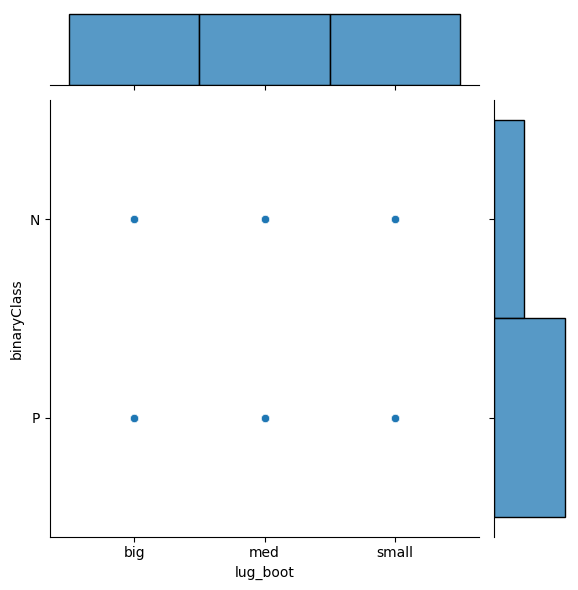

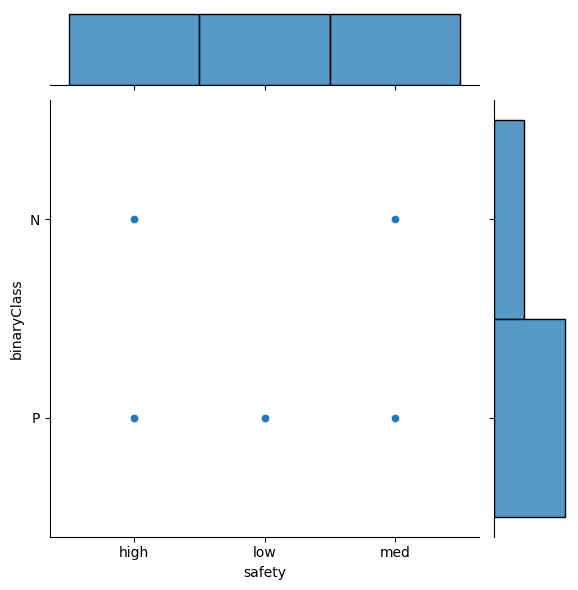

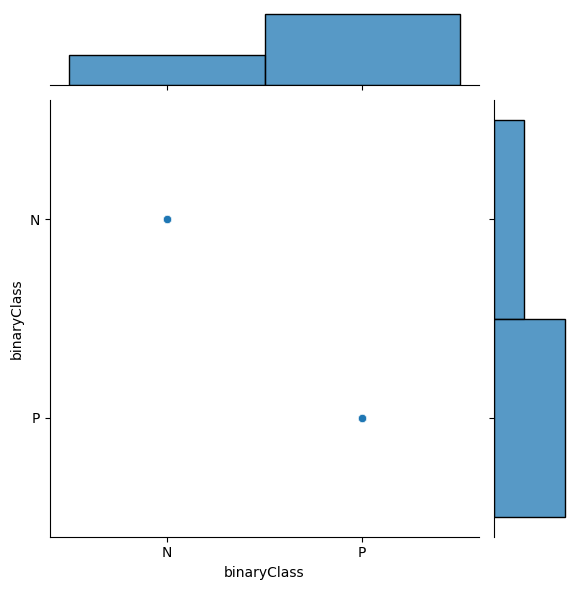

In [11]:
#car_data.columns
l = len(car_data.columns)
for i in range(l):
  sns.jointplot(x=car_data.columns[i],y='binaryClass',
                data=car_data,palette='rainbow')

In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.2, random_state=220)


                                         #print('Dataset size:{}\ntraining data is: {}\n
                                         #testing data is: {}'.format(len(car_data),
                                         #                            len(train_data),len(test_data)))
car_data.shape, train_data.shape, test_data.shape

((1728, 7), (1382, 7), (346, 7))

In [13]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,vhigh,med,2,2,small,high,P
freq,356,355,352,476,478,468,972


In [ ]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [14]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [15]:
train_data['buying'].value_counts()

,count
buying,
vhigh,356
low,349
med,339
high,338


<Axes: xlabel='buying', ylabel='count'>

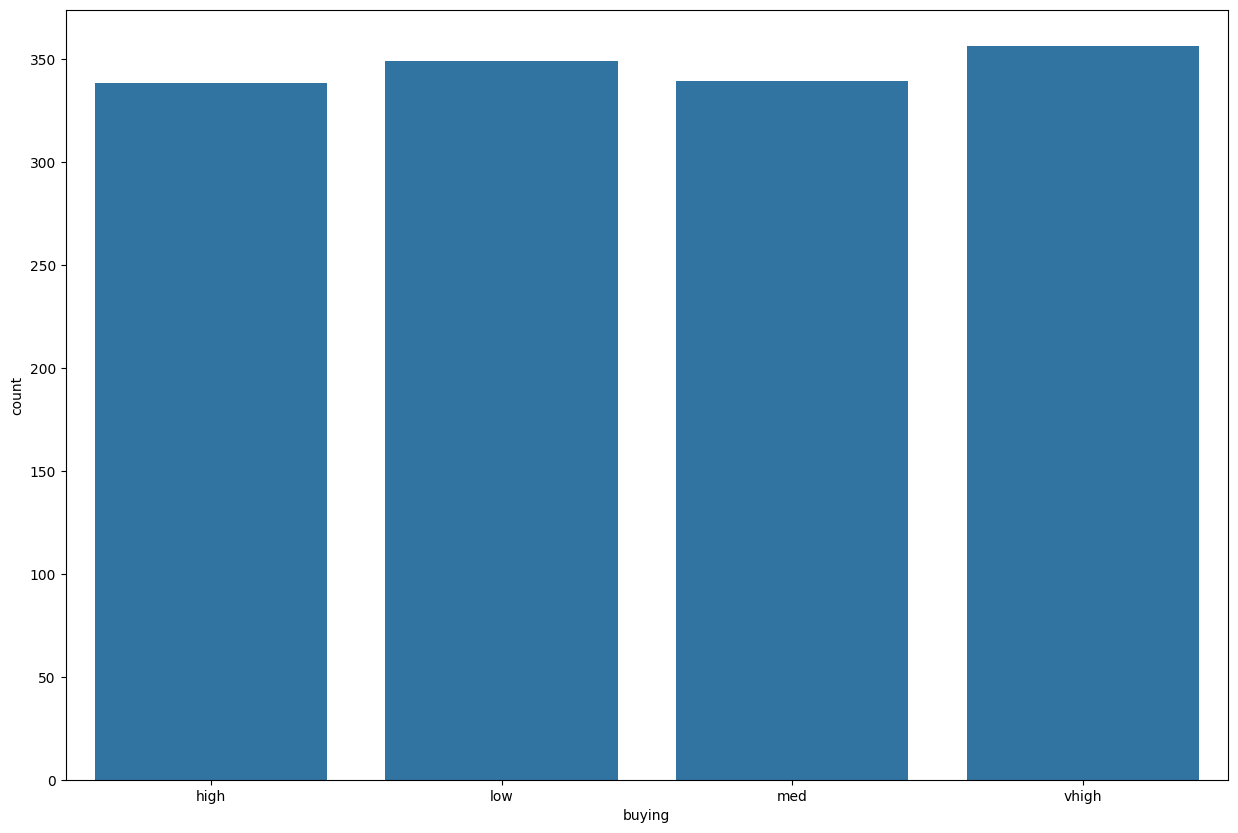

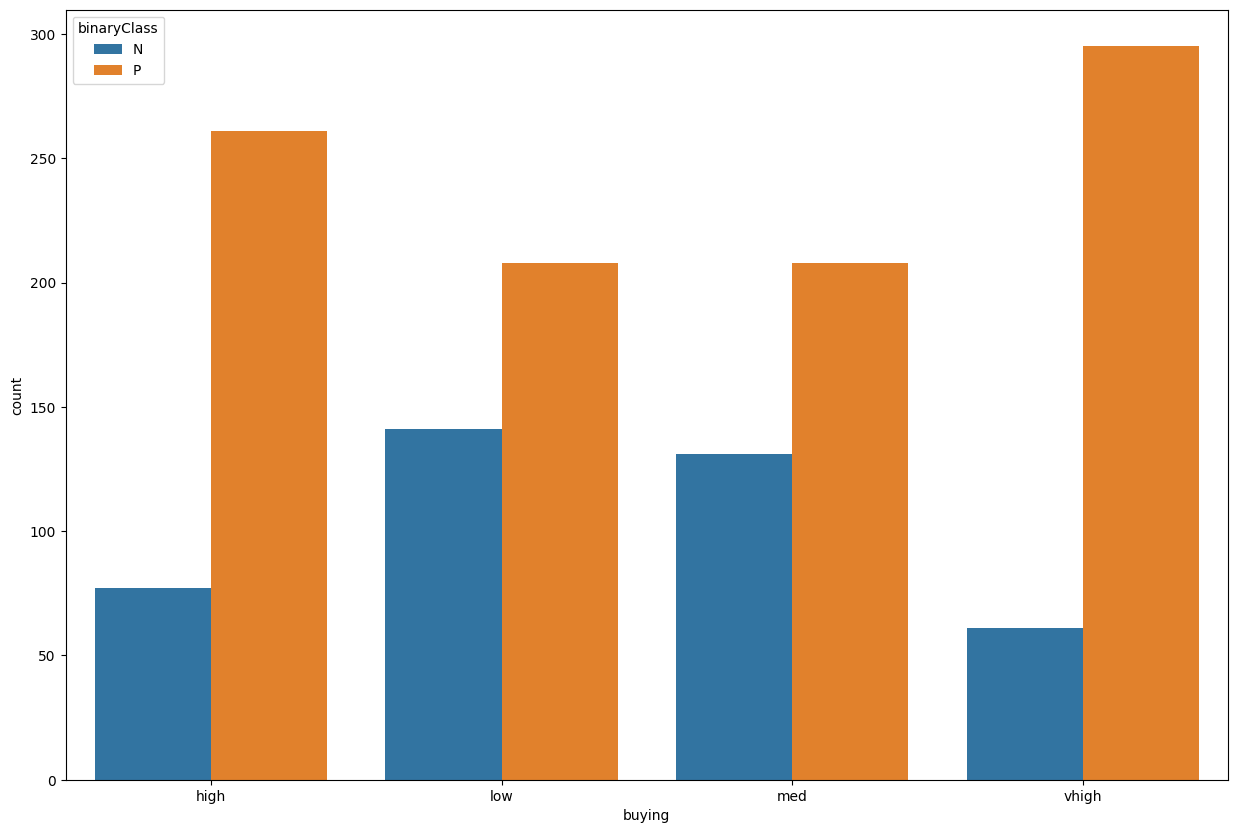

In [16]:
train_data['maint'].value_counts()
train_data['doors'].value_counts()
train_data['persons'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

In [17]:

  train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


<Axes: xlabel='maint', ylabel='count'>

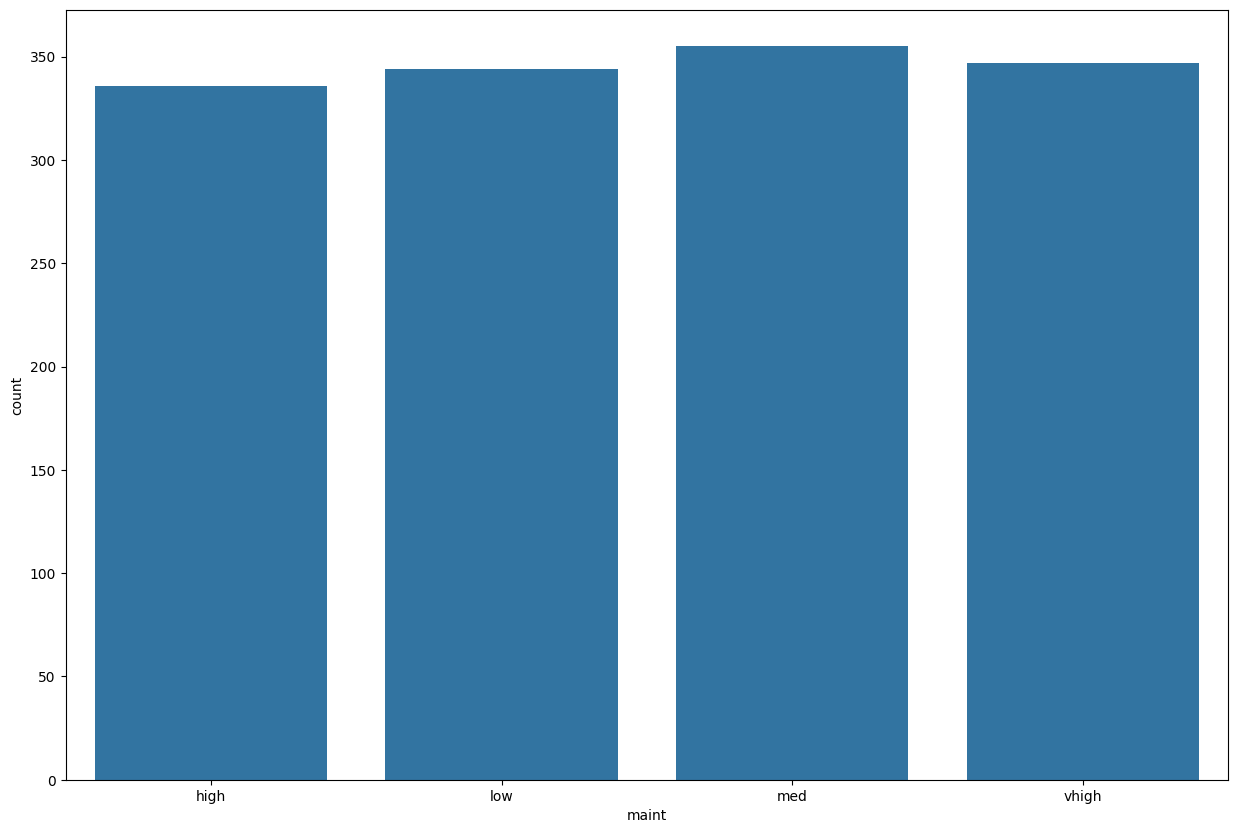

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='maint', ylabel='count'>

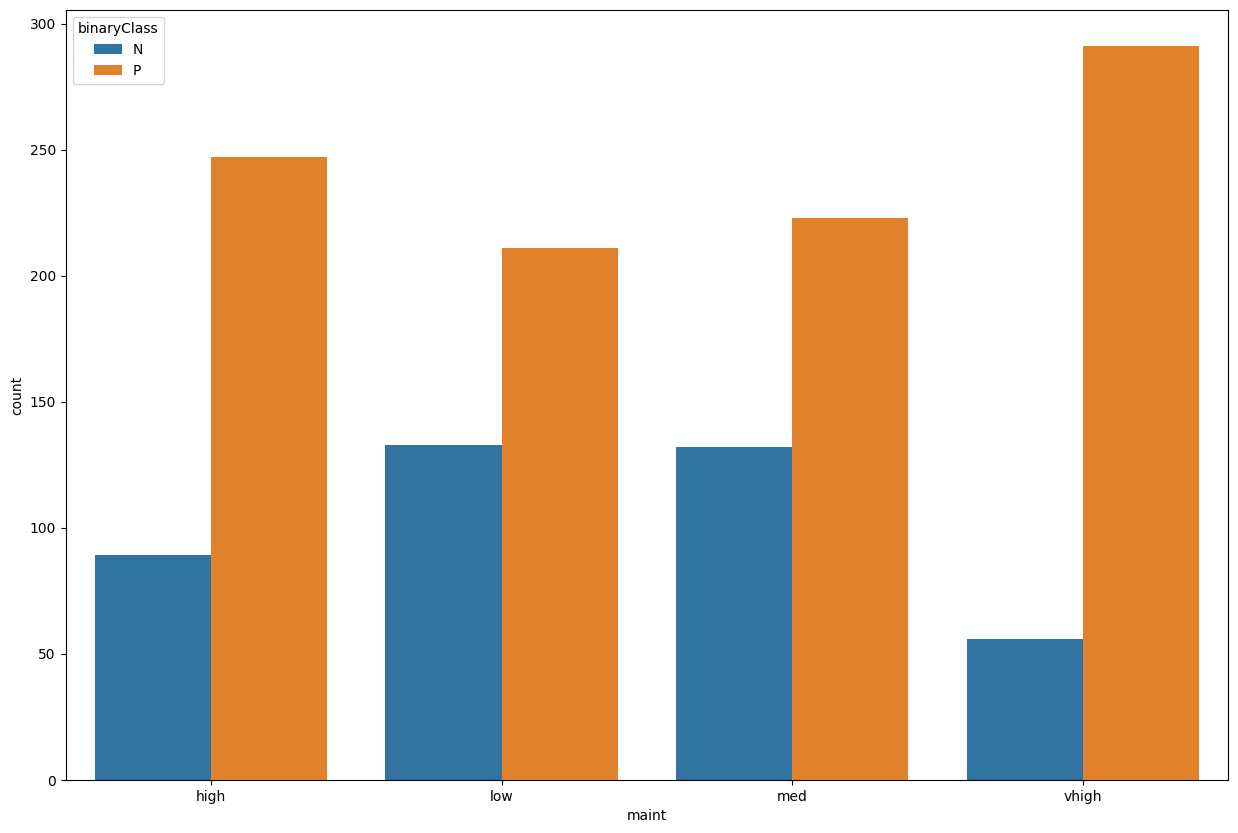

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

In [20]:
train_data['doors'].value_counts()

,count
doors,
2,352
5more,347
3,342
4,341


In [21]:
train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


<Axes: xlabel='buying', ylabel='count'>

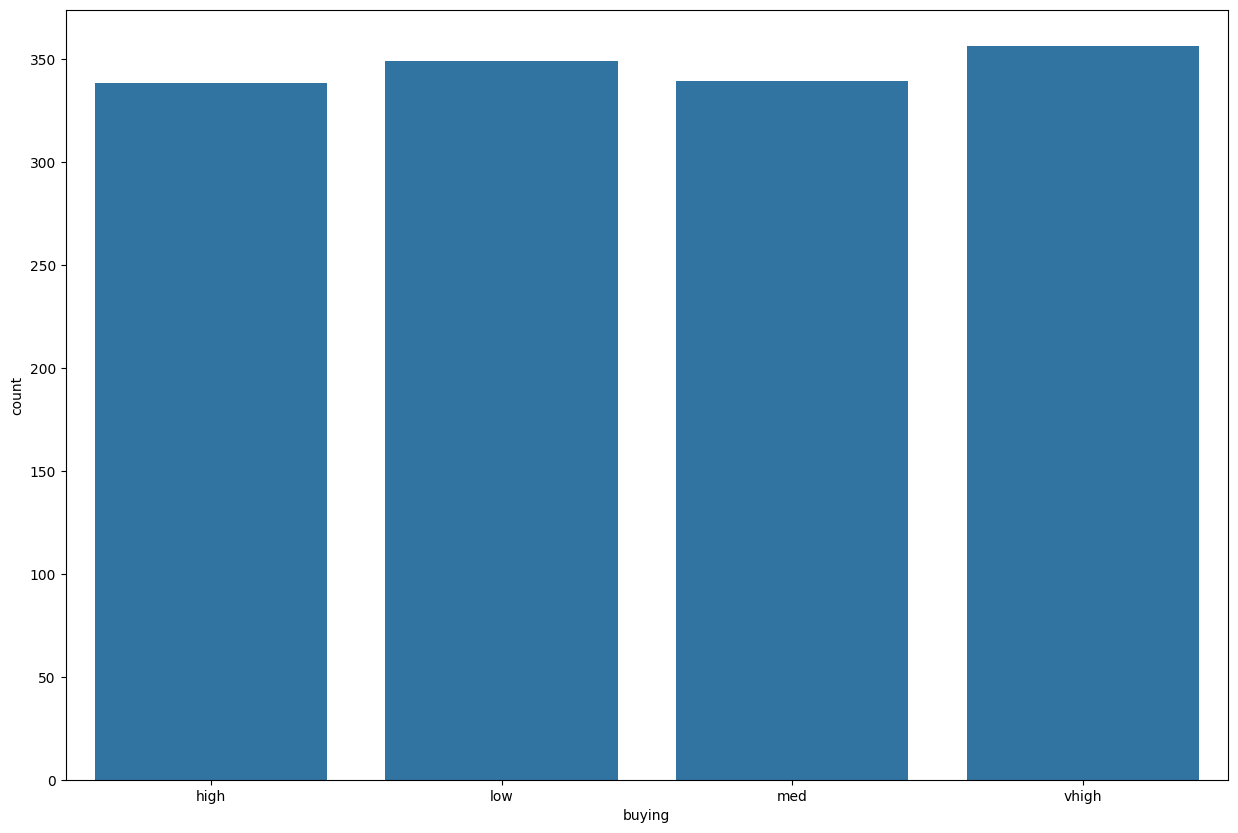

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='lug_boot', ylabel='count'>

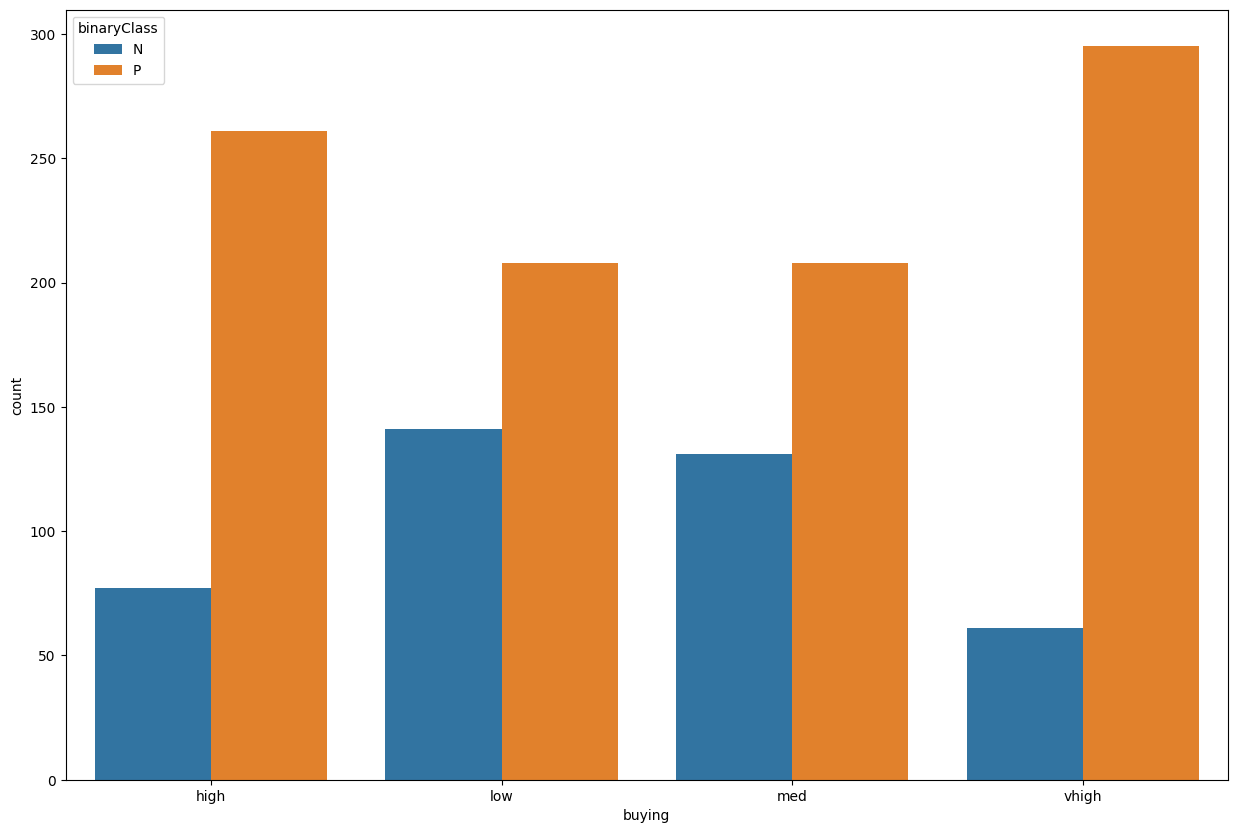

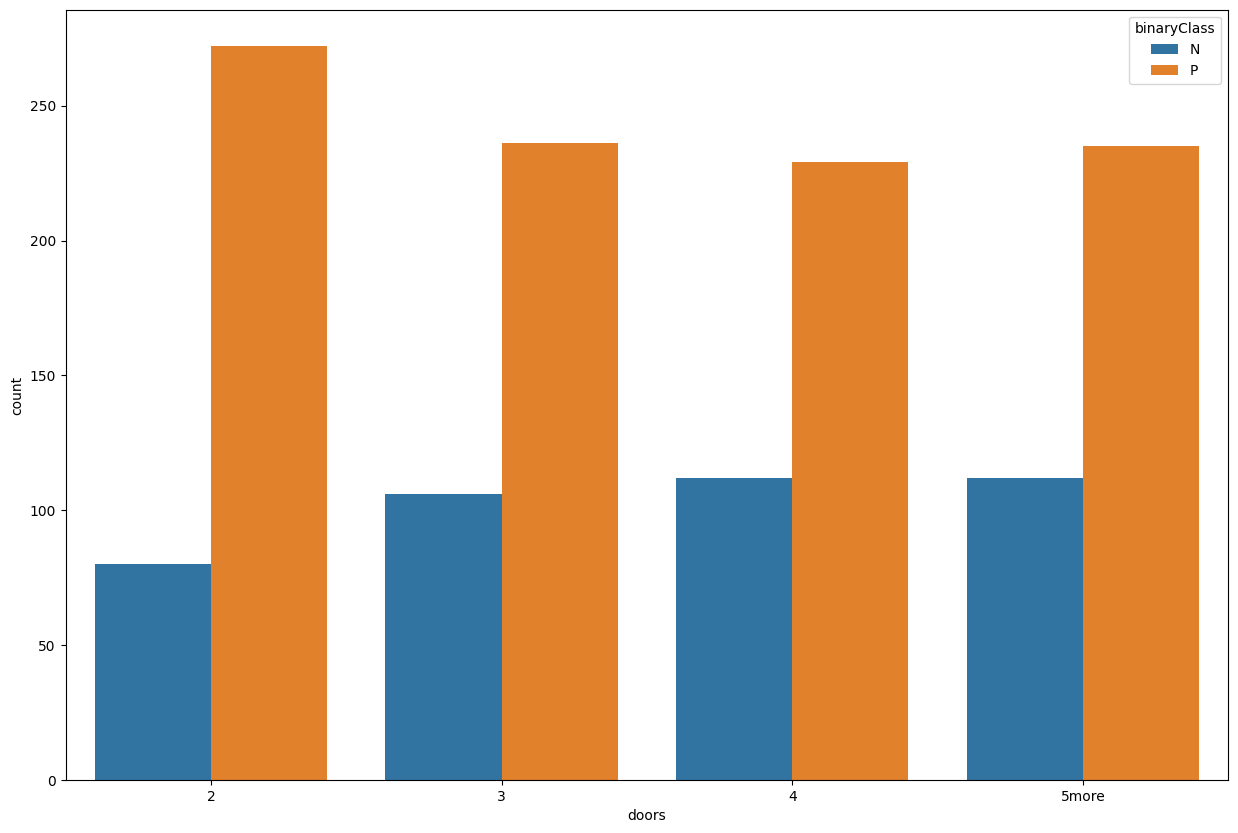

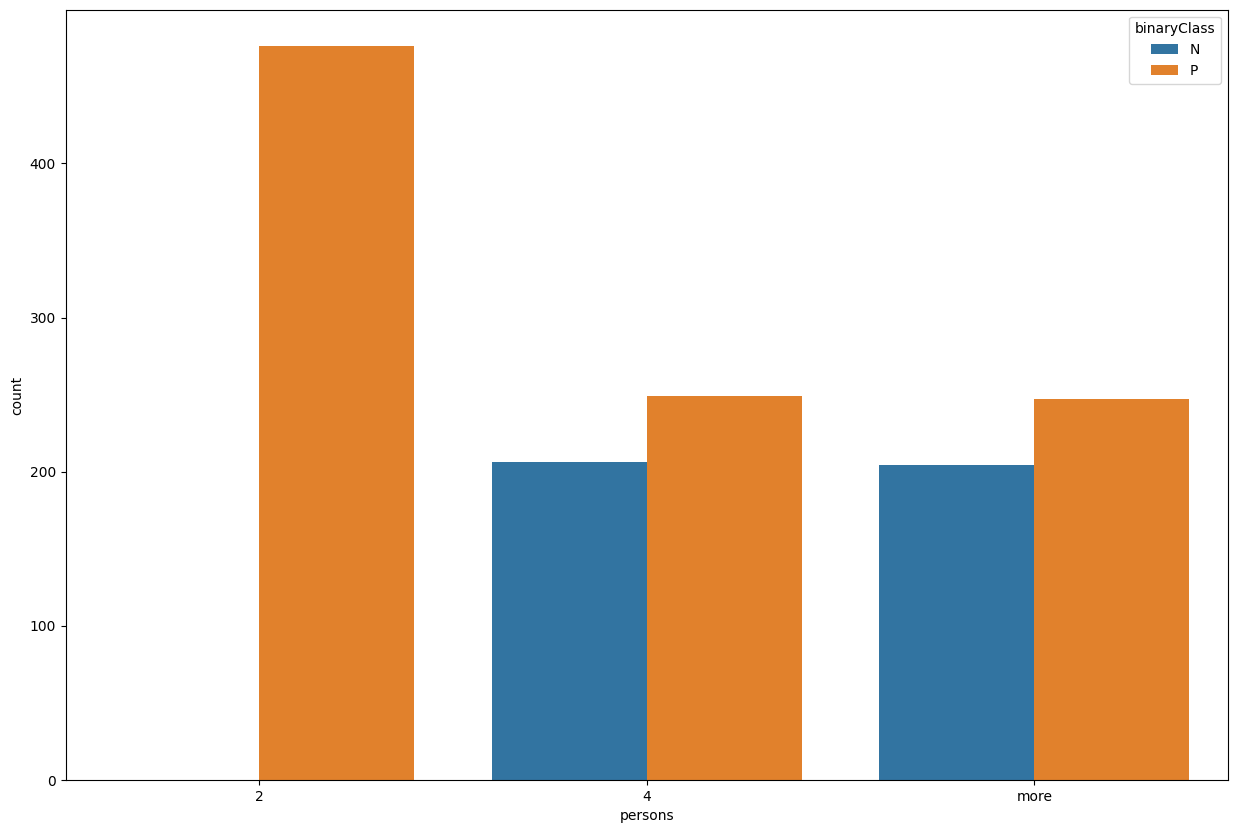

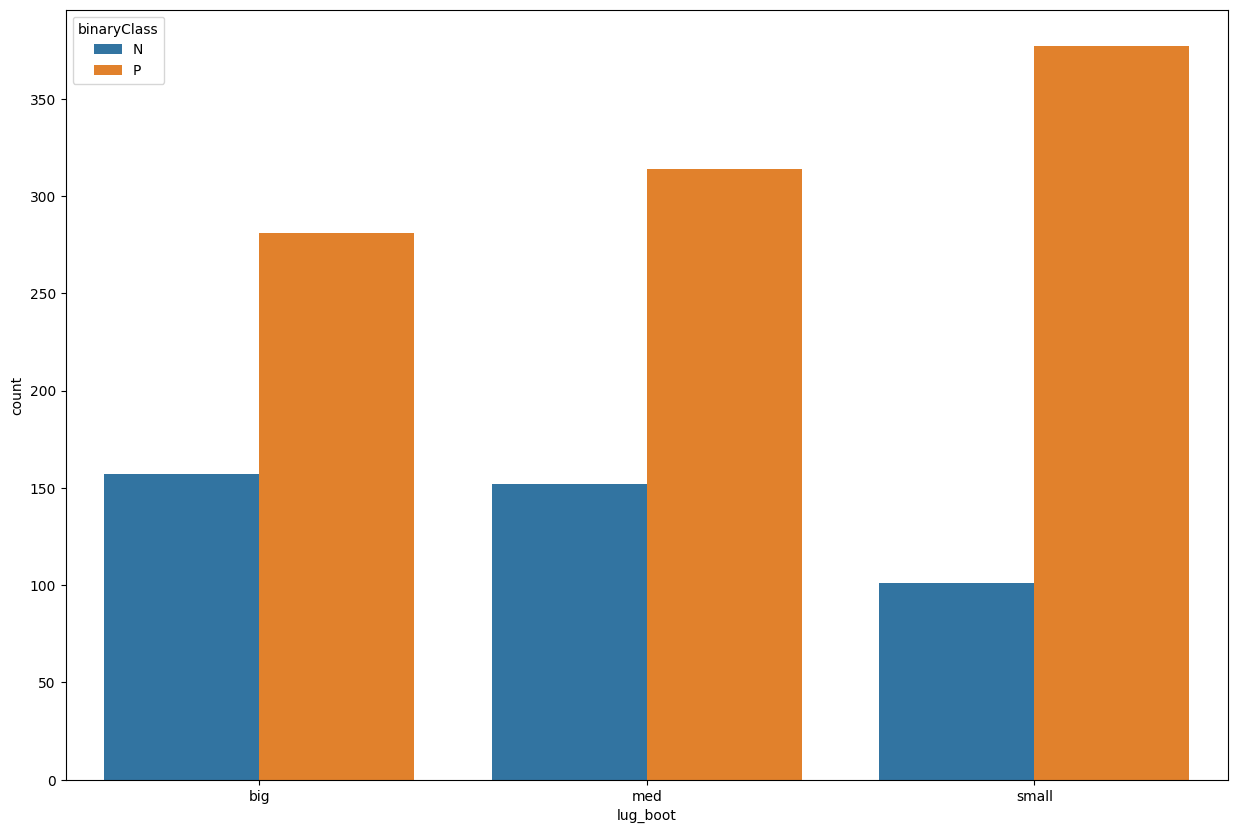

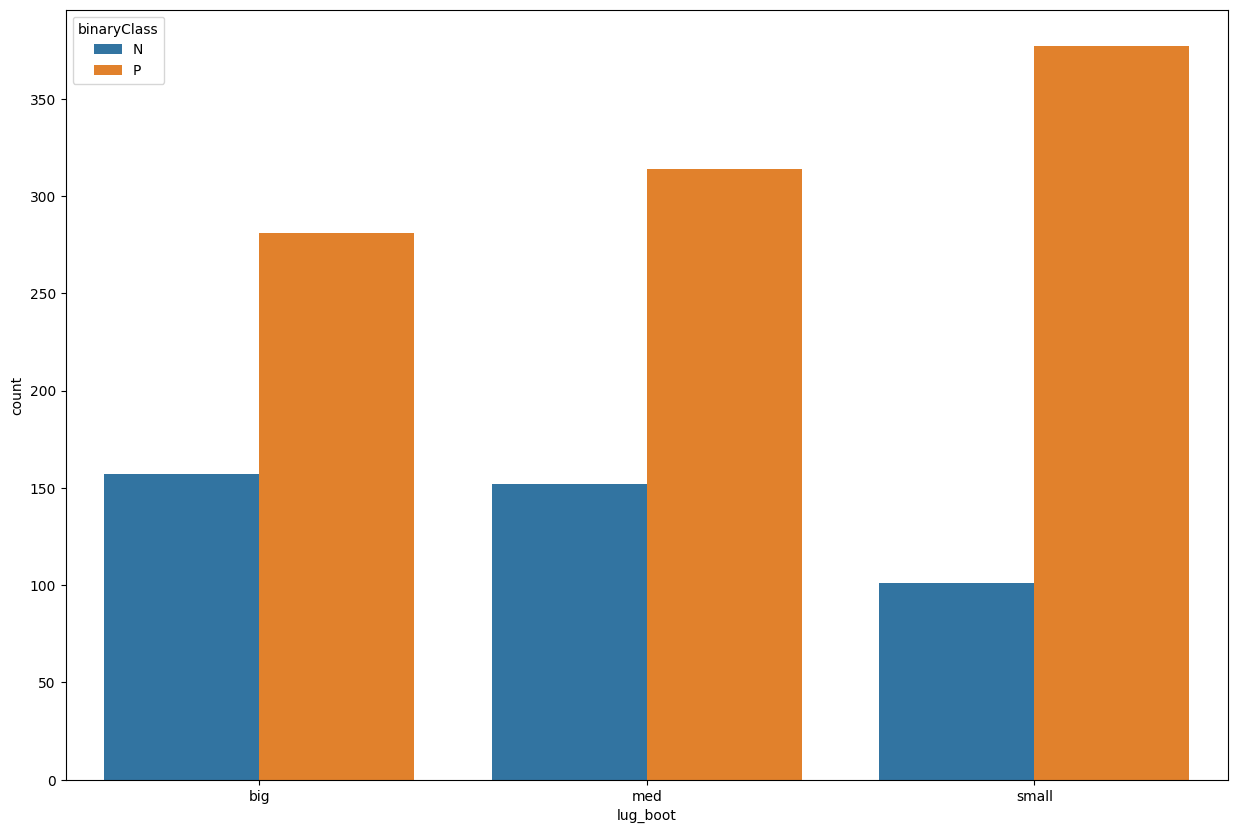

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')
train_data['persons'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')
train_data['lug_boot'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')
train_data['safety'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [25]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([('ord_enc', OrdinalEncoder())])

car_train_prepared = pipe.fit_transform(car_train)
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)
car_train_prepared.shape, car_labels_prepared.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((1382, 6), (1382,))

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.set_params(class_weight='balanced', criterion='entropy')

tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

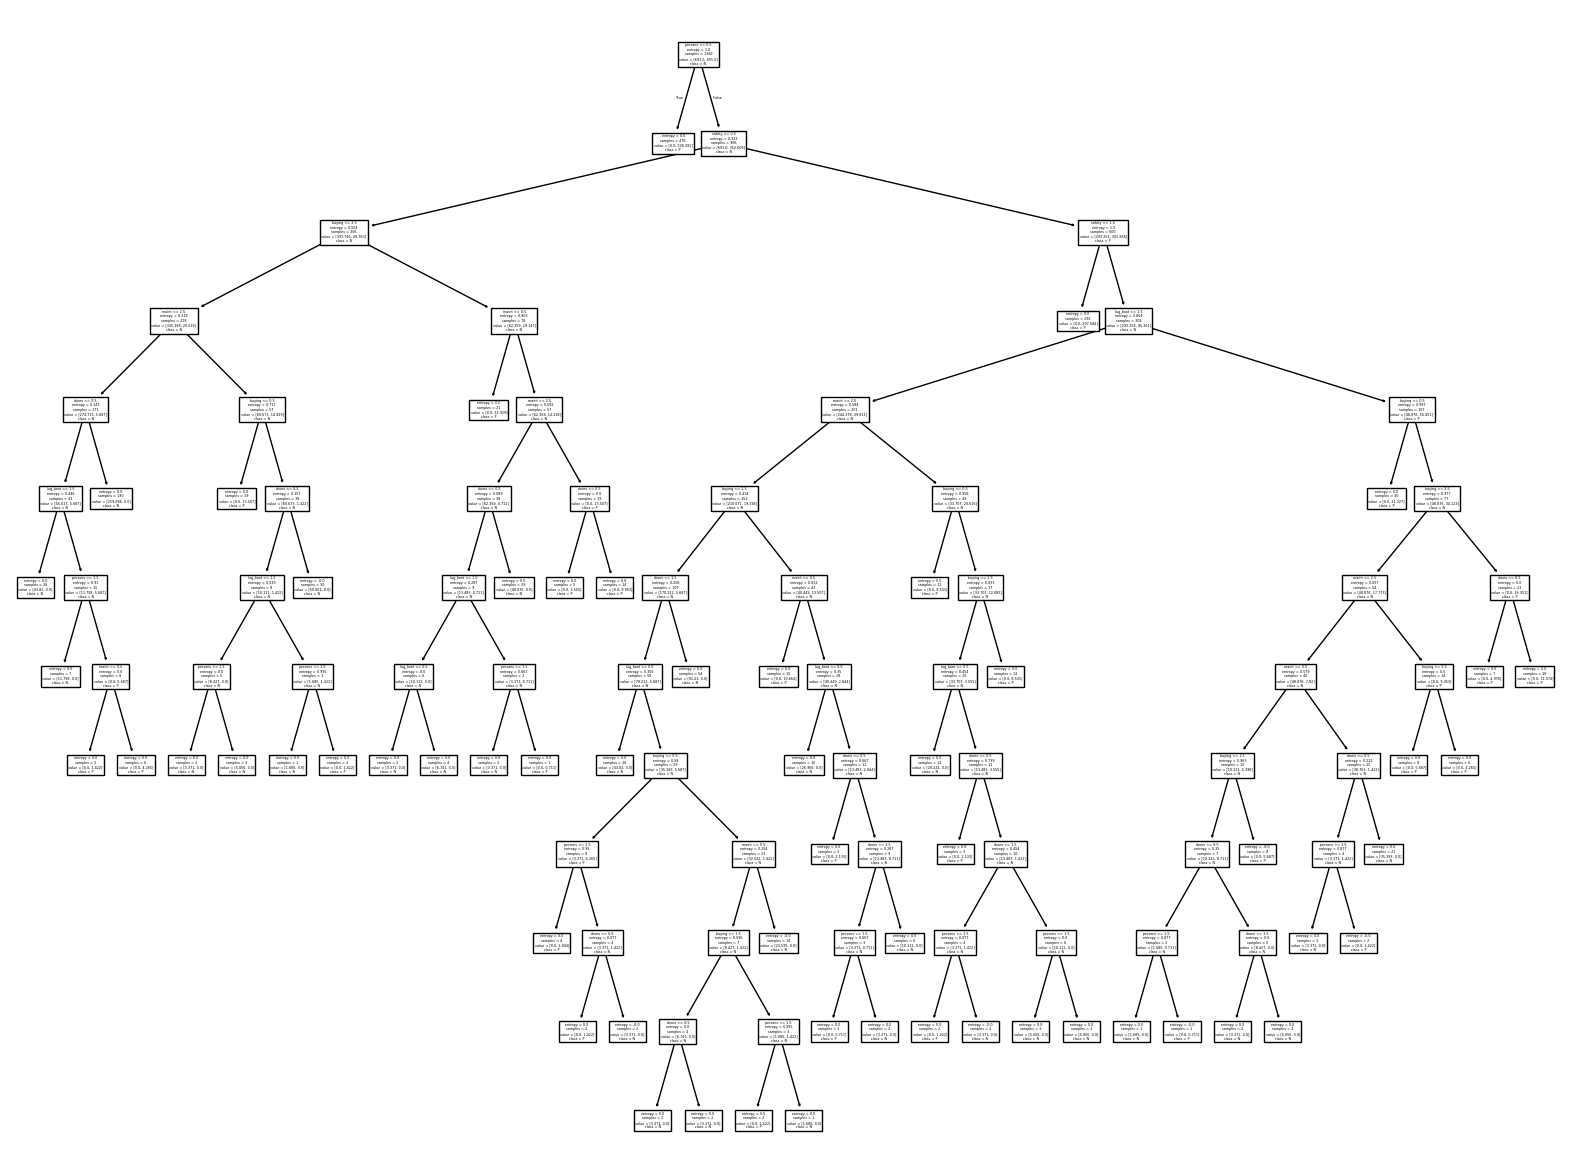

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_clf, feature_names=car_train.columns,
          class_names=['N','P']);